In [1]:
#Description : this program attemps to optimize a users portfolio using the Efficient Frontier



In [2]:
#Import the python libraries
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 

assets = ['TSM', 'MSFT', 'JPM', 'VZ', 'T', 'JNJ', 'AAPL', 'KO', 'VOO', 'FB']

In [4]:
# #Get the stock symbols/ tickers in the portfolio
# #FAANG 

# assets = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG', ]

In [5]:
#Assign weights to the stocks.
weights = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]) #20 percent each

In [6]:
# #Assign weights to the stocks.
# weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2]) #20 percent each

In [7]:
#Get the stock/portfolio starting date
stockStartDate = '2012-01-01'

In [8]:
#Get the stock stocks ending date (date)
today = datetime.today().strftime('%Y-%m-%d')
today

'2022-04-17'

In [9]:
#create a dataframe to store the adjusted close price of the stocks
df = pd.DataFrame()

#Store the adjusted close price of the stock into df 
for stock in assets:
    df[stock] = web.DataReader(stock, data_source='yahoo', start = stockStartDate, end = today)['Adj Close']

In [10]:
#Show the df
df

,TSM,MSFT,JPM,VZ,T,JNJ,AAPL,KO,VOO,FB
Date,,,,,,,,,,
2012-01-03,9.683945,21.623133,26.197283,24.743975,12.585464,49.344902,12.575915,25.443989,96.230019,NaN
2012-01-04,9.596308,22.132010,26.363237,24.420116,12.606178,49.045300,12.643497,25.284378,96.395065,NaN
2012-01-05,9.683945,22.358171,26.913891,24.251961,12.593752,48.985359,12.783868,25.164665,96.708694,NaN
2012-01-06,9.603613,22.705505,26.672503,24.182571,12.476053,48.558441,12.917510,25.005043,96.510620,NaN
2012-01-09,9.771582,22.406639,26.627239,24.207796,12.467646,48.633350,12.897022,25.005043,96.659172,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-08,99.290001,296.970001,133.490005,53.529999,17.973494,182.119995,170.089996,63.830002,411.529999,222.330002
2022-04-11,97.570000,285.260010,133.000000,53.900002,19.351004,179.839996,165.750000,63.810001,404.399994,216.460007
2022-04-12,97.440002,282.059998,131.539993,53.669998,19.282000,179.899994,167.660004,64.559998,402.920013,214.139999


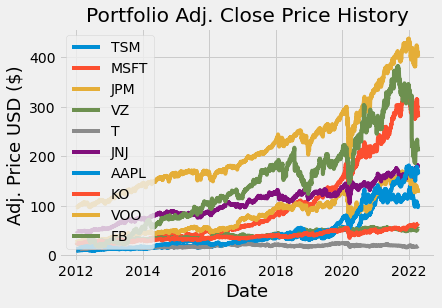

In [11]:
# visually show the stock / portfolio
title = 'Portfolio Adj. Close Price History'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label = c)
    
plt.title(title)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Adj. Price USD ($)', fontsize = 18)
plt.legend(my_stocks.columns.values, loc= 'upper left')
plt.show()

In [12]:
#Show the daily simply return
returns = df.pct_change()
returns

,TSM,MSFT,JPM,VZ,T,JNJ,AAPL,KO,VOO,FB
Date,,,,,,,,,,
2012-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-04,-0.009050,0.023534,0.006335,-0.013088,0.001646,-0.006072,0.005374,-0.006273,0.001715,NaN
2012-01-05,0.009132,0.010219,0.020887,-0.006886,-0.000986,-0.001222,0.011102,-0.004735,0.003254,NaN
2012-01-06,-0.008295,0.015535,-0.008969,-0.002861,-0.009346,-0.008715,0.010454,-0.006343,-0.002048,NaN
2012-01-09,0.017490,-0.013163,-0.001697,0.001043,-0.000674,0.001543,-0.001586,0.000000,0.001539,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-08,-0.012236,-0.014600,0.018308,0.016328,0.017278,0.001981,-0.011909,0.006148,-0.002424,-0.002781
2022-04-11,-0.017323,-0.039432,-0.003671,0.006912,0.076641,-0.012519,-0.025516,-0.000313,-0.017326,-0.026402
2022-04-12,-0.001332,-0.011218,-0.010977,-0.004267,-0.003566,0.000334,0.011523,0.011754,-0.003660,-0.010718


In [13]:
#Create and show the annualized covariance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,TSM,MSFT,JPM,VZ,T,JNJ,AAPL,KO,VOO,FB
TSM,0.080108,0.034823,0.029675,0.010759,0.014788,0.014381,0.037258,0.014148,0.027448,0.032429
MSFT,0.034823,0.066184,0.031199,0.014207,0.016621,0.018854,0.041755,0.017878,0.031873,0.042753
JPM,0.029675,0.031199,0.071763,0.017139,0.025907,0.019517,0.029226,0.021592,0.032720,0.028732
VZ,0.010759,0.014207,0.017139,0.029809,0.023228,0.013735,0.010980,0.014462,0.013814,0.010227
T,0.014788,0.016621,0.025907,0.023228,0.040446,0.015347,0.016318,0.017350,0.018650,0.013106
JNJ,0.014381,0.018854,0.019517,0.013735,0.015347,0.029317,0.016364,0.015315,0.017431,0.015459
AAPL,0.037258,0.041755,0.029226,0.010980,0.016318,0.016364,0.080690,0.015938,0.031277,0.043441
KO,0.014148,0.017878,0.021592,0.014462,0.017350,0.015315,0.015938,0.030734,0.017615,0.013144
VOO,0.027448,0.031873,0.032720,0.013814,0.018650,0.017431,0.031277,0.017615,0.027099,0.031083
FB,0.032429,0.042753,0.028732,0.010227,0.013106,0.015459,0.043441,0.013144,0.031083,0.142802


In [14]:
#Create the portfol variance
port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.025788840324359748

In [15]:
#Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.16058904173186833

In [16]:
#Calculate the annual portfolio return
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.18265849636079093

In [17]:
#Show the expected annual return, volatility (risk), and variance

percent_var = str( round(port_variance, 2) * 100) + '%'
percent_vols = str(round(port_volatility, 2) * 100 ) + '%'
percent_ret = str(round(portfolioSimpleAnnualReturn, 2) * 100) + '%'

print('Expected annual return: '+ percent_ret)
print('Annual volatility / risk: '+ percent_vols)
print('Annual variance: '+  percent_var)

Expected annual return: 18.0%
Annual volatility / risk: 16.0%
Annual variance: 3.0%


In [24]:
pip install PyPortfolioOpt

Note: you may need to restart the kernel to use updated packages.


In [18]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [19]:
#Portfolio Optimization !

#Calculate the expected returns and the annualised sample covariance matrixof asset returns
mu = expected_returns.mean_historical_return(df)
s = risk_models.sample_cov(df)


#Optimize for max sharpe ratio 
ef = EfficientFrontier(mu, s)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('TSM', 0.18758), ('MSFT', 0.37051), ('JPM', 0.0), ('VZ', 0.0), ('T', 0.0), ('JNJ', 0.19989), ('AAPL', 0.24202), ('KO', 0.0), ('VOO', 0.0), ('FB', 0.0)])
Expected annual return: 24.8%
Annual volatility: 19.7%
Sharpe Ratio: 1.16


(0.24823681390269986, 0.19740296051480155, 1.1561975226080075)

In [40]:
#Highlight total  copy and paste and must add to 1 



In [21]:
#Get the discrete alloacation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = 7000.00)


allocation , leftover = da.lp_portfolio()
print('Discrete allocation:', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation: {'TSM': 14, 'MSFT': 9, 'JNJ': 8, 'AAPL': 10}
Funds remaining: $12.39
